# ANÁLISIS EXPLORATORIO DE DATOS

In [81]:
import pandas as pd
from dateutil.parser import parse
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson
from folium.plugins import HeatMap

---

## siniestros_caba.parquet

In [82]:
contenido_siniestros_caba= '_data/siniestros_caba.parquet'
siniestros_caba = pd.read_parquet(contenido_siniestros_caba)

---

## ANÁLISIS GENERAL

### ESTADÍSTICAS

In [83]:
siniestros_caba.head()

,DIA_SEMANA,FECHA,HORA,FRANJA_HORA,FRANJA,COMUNA,BARRIO,TIPO_CALLE,CALLE,LONGITUD,LATITUD,PARTICIPANTES,ACUSADO,N_VICTIMAS,VICTIMA,ROL,SEXO_VICTIMA,EDAD,RANGO_ETARIO
0,Viernes,2016-01-01,0 days 04:00:00,4.0,00:00-06:00,Comuna 8,VILLA RIACHUELO,AVENIDA,PIEDRA BUENA AV.,-58.475340,-34.687570,MOTO-AUTO,AUTO,1,MOTO,CONDUCTOR,MASCULINO,19.0,Entre 15 & 30
1,Sábado,2016-01-02,0 days 01:15:00,1.0,00:00-06:00,Comuna 9,None,GRAL PAZ,"PAZ, GRAL. AV.",-58.508775,-34.669777,AUTO-PASAJEROS,PASAJEROS,1,AUTO,CONDUCTOR,MASCULINO,70.0,Entre 60 & 75
2,Domingo,2016-01-03,0 days 07:00:00,7.0,06:00-12:00,Comuna 1,CONSTITUCION,AVENIDA,ENTRE RIOS AV.,-58.390403,-34.631894,MOTO-AUTO,AUTO,1,MOTO,CONDUCTOR,MASCULINO,30.0,Entre 30 & 45
3,Domingo,2016-01-10,0 days 00:00:00,0.0,00:00-06:00,Comuna 8,VILLA LUGANO,AVENIDA,LARRAZABAL AV.,-58.465039,-34.680930,MOTO-SD,SD,1,MOTO,CONDUCTOR,MASCULINO,18.0,Entre 15 & 30
4,Jueves,2016-01-21,0 days 05:20:00,5.0,00:00-06:00,Comuna 1,CONSTITUCION,AVENIDA,SAN JUAN AV.,-58.387183,-34.622466,MOTO-PASAJEROS,PASAJEROS,1,MOTO,CONDUCTOR,MASCULINO,29.0,Entre 15 & 30


In [84]:
siniestros_caba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   DIA_SEMANA     1179 non-null   object         
 1   FECHA          1179 non-null   datetime64[ns] 
 2   HORA           1178 non-null   timedelta64[ns]
 3   FRANJA_HORA    1178 non-null   float64        
 4   FRANJA         1179 non-null   object         
 5   COMUNA         1179 non-null   object         
 6   BARRIO         1134 non-null   object         
 7   TIPO_CALLE     1179 non-null   object         
 8   CALLE          1179 non-null   object         
 9   LONGITUD       1175 non-null   float64        
 10  LATITUD        1175 non-null   float64        
 11  PARTICIPANTES  1179 non-null   object         
 12  ACUSADO        1179 non-null   object         
 13  N_VICTIMAS     1179 non-null   int64          
 14  VICTIMA        1179 non-null   object         
 15  ROL 

In [85]:
siniestros_caba.describe()

,FECHA,HORA,FRANJA_HORA,LONGITUD,LATITUD,N_VICTIMAS,EDAD
count,1179,1178,1178.000000,1175.000000,1175.000000,1179.000000,1023.000000
mean,2019-08-19 12:58:00.916030464,0 days 12:46:54.057724957,12.415110,-58.442196,-34.615596,1.183206,40.601173
min,2016-01-01 00:00:00,0 days 00:00:00,0.000000,-58.529970,-34.705250,1.000000,1.000000
25%,2018-01-18 12:00:00,0 days 07:40:00,7.000000,-58.478237,-34.639533,1.000000,26.000000
50%,2020-02-14 00:00:00,0 days 13:00:00,13.000000,-58.444513,-34.618232,1.000000,36.000000
75%,2021-03-05 00:00:00,0 days 18:07:15,18.000000,-58.403645,-34.592156,1.000000,52.000000
max,2021-12-31 00:00:00,0 days 23:54:00,23.000000,-58.356082,-34.534654,10.000000,95.000000
std,NaN,0 days 06:27:20.129640292,6.444061,0.045642,0.035207,0.629244,18.887484


### OUTLIERS

#### Mapa de Correlación

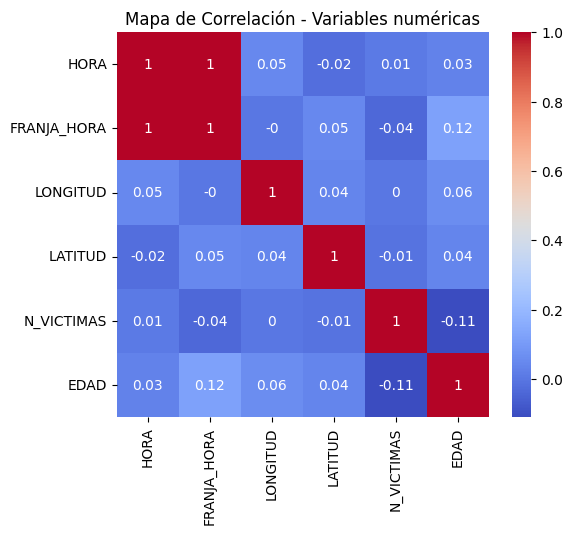

In [86]:
dataNumerica = siniestros_caba.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

In [87]:
siniestros_caba_aux = siniestros_caba.copy()
siniestros_caba_aux['EDAD'] = siniestros_caba_aux['EDAD'].replace('SD', np.nan)

In [88]:
siniestros_caba_aux['EDAD'].describe()

count    1023.000000
mean       40.601173
std        18.887484
min         1.000000
25%        26.000000
50%        36.000000
75%        52.000000
max        95.000000
Name: EDAD, dtype: float64

In [89]:
siniestros_caba['N_VICTIMAS'].describe()

count    1179.000000
mean        1.183206
std         0.629244
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: N_VICTIMAS, dtype: float64

In [90]:
indice_max_n_victimas = siniestros_caba['N_VICTIMAS'].idxmax()
fila_max_n_victimas = siniestros_caba.loc[indice_max_n_victimas]
print("Fila con el máximo valor en 'N_VICTIMAS':")
print(fila_max_n_victimas)

Fila con el máximo valor en 'N_VICTIMAS':
DIA_SEMANA                            Viernes
FECHA                     2021-03-26 00:00:00
HORA                          0 days 12:40:00
FRANJA_HORA                              12.0
FRANJA                            12:00-18:00
COMUNA                               Comuna 9
BARRIO                              MATADEROS
TIPO_CALLE                              CALLE
CALLE                   SUAREZ, JUSTO ANTONIO
LONGITUD                           -58.502096
LATITUD                            -34.668862
PARTICIPANTES    TRANSPORTE PUBLICO-CAMIONETA
ACUSADO                             CAMIONETA
N_VICTIMAS                                 10
VICTIMA                    TRANSPORTE PUBLICO
ROL                                        SD
SEXO_VICTIMA                        MASCULINO
EDAD                                     46.0
RANGO_ETARIO                    Entre 45 & 60
Name: 908, dtype: object


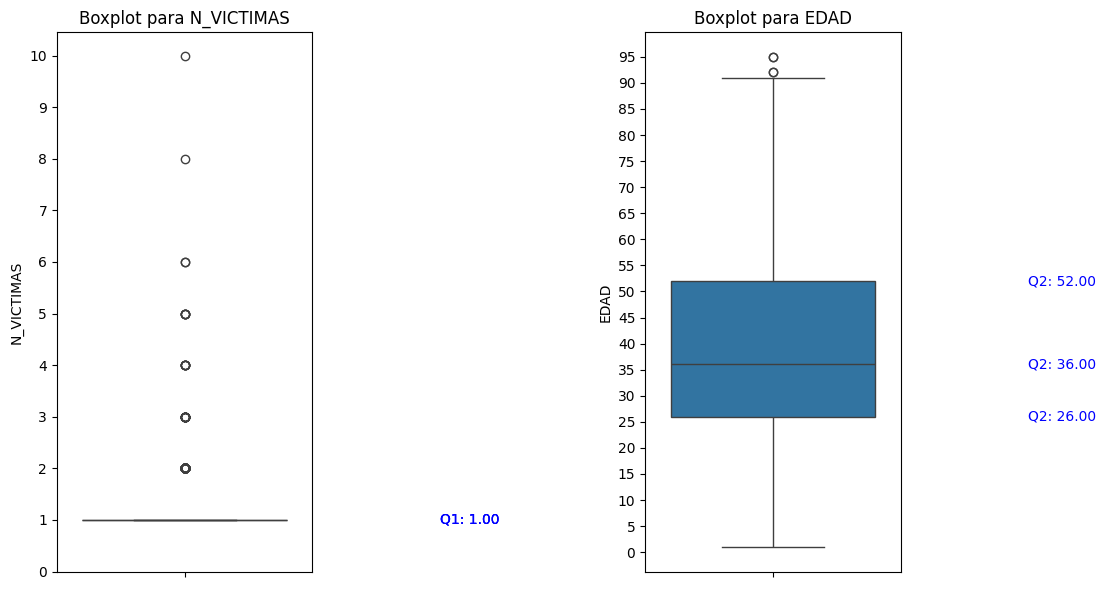

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(y=siniestros_caba['N_VICTIMAS'], ax=axes[0])
axes[0].set_title('Boxplot para N_VICTIMAS')
axes[0].set_ylabel('N_VICTIMAS')
axes[0].set_yticks(range(0, max(siniestros_caba['N_VICTIMAS'])+1, 1)) 

sns.boxplot(y=siniestros_caba_aux['EDAD'], ax=axes[1])
axes[1].set_title('Boxplot para EDAD')
axes[1].set_ylabel('EDAD')
axes[1].set_yticks(range(0, int(max(siniestros_caba_aux['EDAD']))+1, 5)) 

summary_n_victimas = siniestros_caba['N_VICTIMAS'].describe()
summary_edad = siniestros_caba_aux['EDAD'].describe()

for i, (ax, summary) in enumerate(zip(axes, [summary_n_victimas, summary_edad])):
    for quartile, value in zip(['25%', '50%', '75%'], summary[['25%', '50%', '75%']]):
        ax.text(1, value, f'Q{i+1}: {value:.2f}', va='center', ha='left', color='blue', fontsize=10)

plt.tight_layout()
plt.show()

In [92]:
from summarytools import dfSummary

# dfSummary(siniestros_caba, is_collapsible=True)

In [93]:
try:
    siniestros_caba = siniestros_caba_aux.replace('SD', np.nan)
except Exception as e:
    print(f"Error: {e}")

In [94]:
import sweetviz as sv

# report = sv.analyze(siniestros_caba)
# report.show_html()  # Genera un informe HTML interactivo

---
---

## GEOLOCALIZACION

In [95]:
def geoloc_barrios():
    ruta_archivo = '_data/barrios.geojson'
    barrios = gpd.read_file(ruta_archivo)
    siniestros_caba['geometry'] = siniestros_caba.apply(lambda x: Point((float(x.LONGITUD), float(x.LATITUD))), axis=1)
    gdf_siniestros = gpd.GeoDataFrame(siniestros_caba, geometry='geometry')
    siniestros_en_barrios = gpd.sjoin(gdf_siniestros, barrios, how="inner", op='intersects')
    siniestros_caba['BARRIO'] = siniestros_en_barrios['BARRIO']
    siniestros_caba.drop(columns='geometry', inplace=True)

In [96]:
cantidad_barrios = siniestros_caba['BARRIO'].nunique()
print(f"La cantidad de barrios únicos en la columna 'BARRIO' es: {cantidad_barrios}")
barrios_unicos = siniestros_caba['BARRIO'].unique()
print("Los barrios únicos en la columna 'BARRIO' son:")
print(barrios_unicos)


La cantidad de barrios únicos en la columna 'BARRIO' es: 48
Los barrios únicos en la columna 'BARRIO' son:
['VILLA RIACHUELO' None 'CONSTITUCION' 'VILLA LUGANO' 'VILLA SOLDATI'
 'VILLA DEL PARQUE' 'MONSERRAT' 'BARRACAS' 'VILLA CRESPO' 'MATADEROS'
 'SAN NICOLAS' 'FLORES' 'SAAVEDRA' 'PARQUE CHACABUCO' 'NUEVA POMPEYA'
 'BALVANERA' 'CHACARITA' 'BELGRANO' 'VILLA URQUIZA' 'PALERMO'
 'VELEZ SARSFIELD' 'CABALLITO' 'RECOLETA' 'SAN CRISTOBAL' 'FLORESTA'
 'PATERNAL' 'NUÑEZ' 'LINIERS' 'ALMAGRO' 'VILLA DEVOTO' 'PARQUE AVELLANEDA'
 'RETIRO' 'VILLA ORTUZAR' 'VILLA LURO' 'VILLA REAL' 'BOEDO' 'BOCA'
 'PARQUE PATRICIOS' 'VERSALLES' 'VILLA SANTA RITA' 'COGHLAN' 'SAN TELMO'
 'VILLA GRAL. MITRE' 'PUERTO MADERO' 'VILLA PUEYRREDON' 'PARQUE CHAS'
 'COLEGIALES' 'AGRONOMIA' 'MONTE CASTRO']


/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_14435/653190157.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_interseccion = gpd.overlay(gdf, mapa_shapefile, how='intersection')


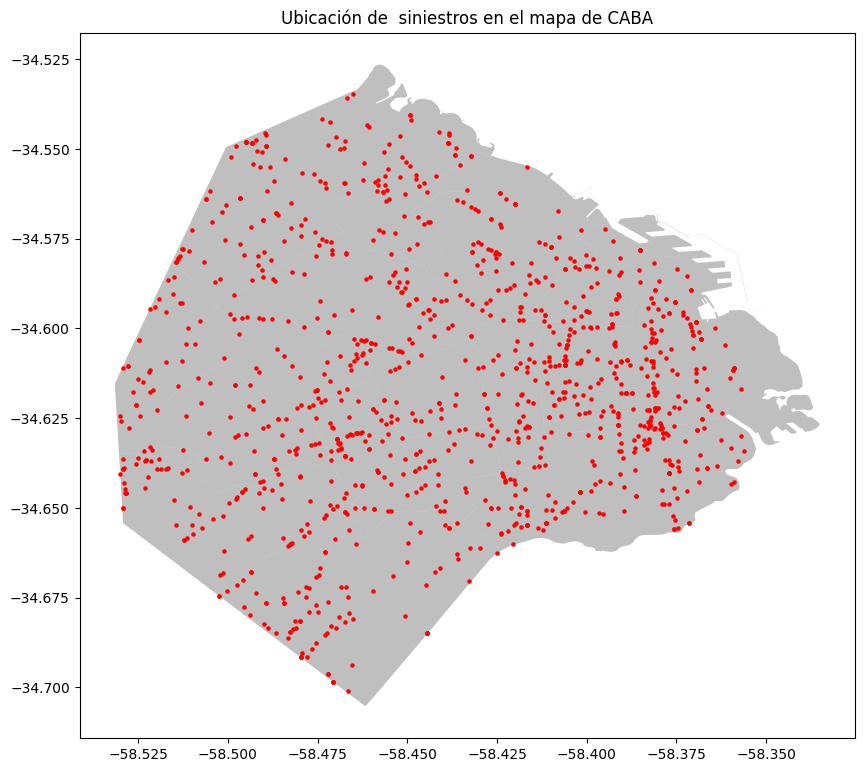

In [97]:
ruta_geojson = '_data/comunas.geojson'

geometry = gpd.points_from_xy(siniestros_caba['LONGITUD'], siniestros_caba['LATITUD'])
gdf = gpd.GeoDataFrame(siniestros_caba, geometry=geometry)
mapa_shapefile = gpd.read_file(ruta_geojson)
gdf_interseccion = gpd.overlay(gdf, mapa_shapefile, how='intersection')
fig, ax = plt.subplots(figsize=(10, 10))
mapa_shapefile.plot(ax=ax, alpha=0.5, color='grey')  
gdf_interseccion.plot(ax=ax, color='red', markersize=5) 
plt.title('Ubicación de  siniestros en el mapa de CABA')
plt.show()

### COMUNAS

In [98]:
ocurrencias_por_comuna = siniestros_caba['COMUNA'].value_counts().sort_values(ascending=False)
ocurrencias_por_comuna.head()

COMUNA
Comuna 1    151
Comuna 4    123
Comuna 9    103
Comuna 7     96
Comuna 8     88
Name: count, dtype: int64

/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_14435/3231670326.py:9: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_interseccion = gpd.overlay(gdf, mapa_shapefile, how='intersection')


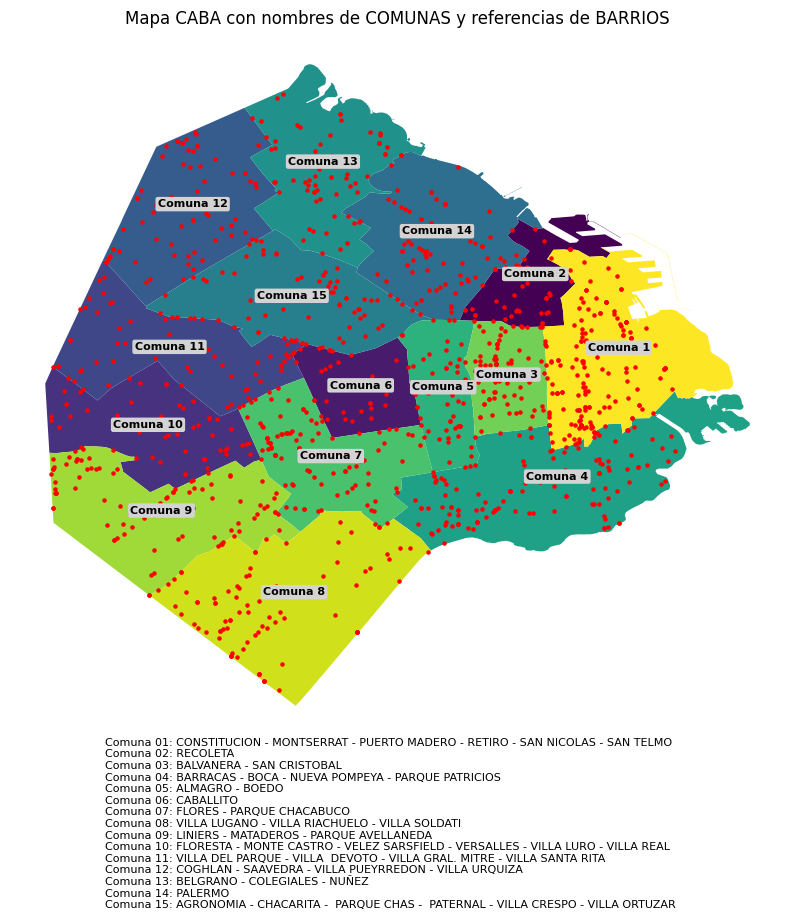

In [99]:
ruta_geojson = '_data/comunas.geojson'

geometry = gpd.points_from_xy(siniestros_caba['LONGITUD'], siniestros_caba['LATITUD'])
gdf = gpd.GeoDataFrame(siniestros_caba, geometry=geometry)

datos_shapefile = gpd.read_file(ruta_geojson)

datos_shapefile['COMUNAS'] = datos_shapefile['COMUNAS'].astype(int)
gdf_interseccion = gpd.overlay(gdf, mapa_shapefile, how='intersection')

fig, ax = plt.subplots(figsize=(10, 15))
datos_shapefile.plot(ax=ax, cmap='viridis') 

for idx, row in datos_shapefile.iterrows():
    etiqueta = f"Comuna {int(row['COMUNAS'])}" 
    plt.annotate(text=etiqueta, xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 xytext=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black',weight='bold',
                 bbox=dict(facecolor='lightgrey', edgecolor='none', 
                 boxstyle='round,pad=0.2'))

gdf_interseccion.plot(ax=ax, color='red', markersize=5)  

leyendas = datos_shapefile[['BARRIOS', 'COMUNAS']].drop_duplicates().sort_values(by='COMUNAS')
leyenda_texto = "\n".join([f"Comuna {str(comuna).zfill(2)}: {barrio}" for barrio, comuna in zip(leyendas['BARRIOS'], leyendas['COMUNAS'])])

plt.figtext( 0.22, 0.14, leyenda_texto, fontsize=8,
             ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0, pad=10))
plt.subplots_adjust(bottom=0.1)

plt.title('Mapa CABA con nombres de COMUNAS y referencias de BARRIOS')
plt.axis('off')
plt.show()


In [100]:
import geopandas as gpd

# Carga el archivo GeoJSON
archivo_geojson = "_data/comunas.geojson"
gdf = gpd.read_file(archivo_geojson)

# Obtiene las coordenadas máximas y mínimas
latitud_maxima = gdf.bounds['maxy'].max()
latitud_minima = gdf.bounds['miny'].min()
longitud_maxima = gdf.bounds['maxx'].max()
longitud_minima = gdf.bounds['minx'].min()

# Muestra los resultados
print("Latitud máxima:", latitud_maxima)
print("Latitud mínima:", latitud_minima)
print("Longitud máxima:", longitud_maxima)
print("Longitud mínima:", longitud_minima)

Latitud máxima: -34.526489451612655
Latitud mínima: -34.70529313515961
Longitud máxima: -58.335150321796654
Longitud mínima: -58.531518740591004


### BARRIOS

In [101]:
ocurrencias_por_barrio = siniestros_caba['BARRIO'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

BARRIO
PALERMO          77
FLORES           73
BALVANERA        53
NUEVA POMPEYA    47
CONSTITUCION     45
Name: count, dtype: int64

### CALLES

In [102]:
ocurrencias_por_barrio = siniestros_caba['CALLE'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

CALLE
PAZ, GRAL. AV.        81
RIVADAVIA AV.         40
DEL LIBERTADOR AV.    32
SAN MARTIN AV.        22
JUSTO, JUAN B. AV.    21
Name: count, dtype: int64

### TIPO CALLE

In [103]:
ocurrencias_por_barrio = siniestros_caba['TIPO_CALLE'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

TIPO_CALLE
AVENIDA      694
CALLE        314
GRAL PAZ      90
AUTOPISTA     71
Name: count, dtype: int64

In [104]:
siniestros_caba.head(0)

,DIA_SEMANA,FECHA,HORA,FRANJA_HORA,FRANJA,COMUNA,BARRIO,TIPO_CALLE,CALLE,LONGITUD,LATITUD,PARTICIPANTES,ACUSADO,N_VICTIMAS,VICTIMA,ROL,SEXO_VICTIMA,EDAD,RANGO_ETARIO


## PARTICIPANTES

In [105]:
ocurrencias_por_barrio = siniestros_caba['PARTICIPANTES'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

PARTICIPANTES
MOTO-AUTO           150
SD-SD               145
PEATON-PASAJEROS    105
PEATON-AUTO         104
MOTO-CARGAS          80
Name: count, dtype: int64

## ACUSADO

In [106]:
ocurrencias_por_barrio = siniestros_caba['ACUSADO'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

ACUSADO
AUTO           335
PASAJEROS      178
CARGAS         150
OBJETO FIJO     85
MOTO            85
Name: count, dtype: int64

## SEXO VICTIMAS

In [107]:
ocurrencias_por_barrio = siniestros_caba['SEXO_VICTIMA'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

SEXO_VICTIMA
MASCULINO    814
FEMENINO     269
Name: count, dtype: int64

## VICTIMAS

In [108]:
siniestros_filtrado = siniestros_caba[siniestros_caba['VICTIMA'] != 'SD']
sumatoria_por_categoria = siniestros_filtrado.groupby('VICTIMA')['N_VICTIMAS'].sum().sort_values(ascending=False)
sumatoria_por_categoria.head(10)

VICTIMA
MOTO                  495
PEATON                350
AUTO                  154
CICLISTA               46
BICICLETA              29
CAMIONETA              20
TRANSPORTE PUBLICO     15
MIXTO                  10
CAMION                  7
CARGAS                  7
Name: N_VICTIMAS, dtype: int64

## DIAS DE LA SEMANA

In [109]:
ocurrencias_por_barrio = siniestros_caba['DIA_SEMANA'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

DIA_SEMANA
Viernes    181
Lunes      171
Jueves     170
Sábado     168
Domingo    167
Name: count, dtype: int64

## RANGO ETARIO, EDADES

In [110]:
ocurrencias_por_barrio = siniestros_caba['RANGO_ETARIO'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

RANGO_ETARIO
 Entre 15 & 30    330
Entre 30 & 45     318
Entre 45 & 60     171
Entre 60 & 75      95
nan                76
Name: count, dtype: int64

In [111]:
ocurrencias_por_EDAD = siniestros_caba['EDAD'] # [(siniestros_caba['EDAD'] != 'NaN') & (siniestros_caba['EDAD'] != 0.0)]
conteo_EDAD_VICTIMA = ocurrencias_por_EDAD.value_counts()
conteo_EDAD_VICTIMA = conteo_EDAD_VICTIMA.sort_index()

In [112]:
conteo_EDAD_VICTIMA.head()

EDAD
1.0    2
2.0    2
3.0    1
4.0    2
5.0    3
Name: count, dtype: int64

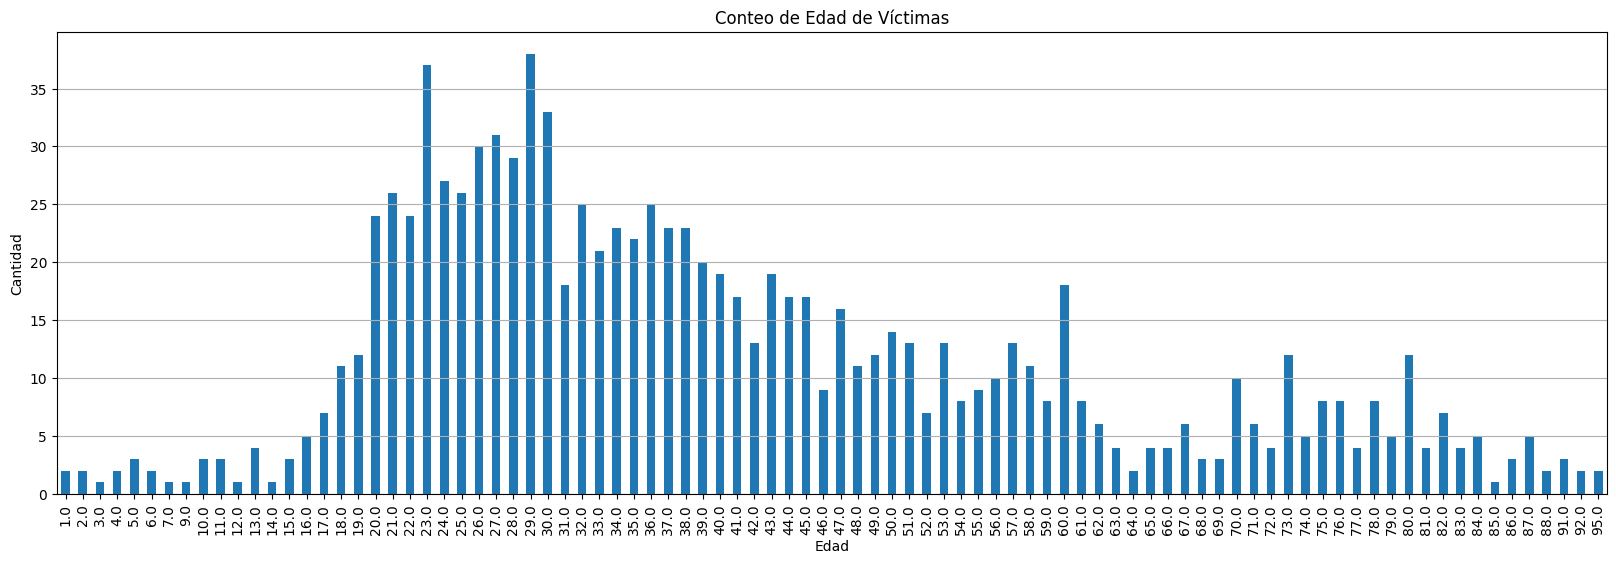

In [113]:
plt.figure(figsize=(20, 6))
conteo_EDAD_VICTIMA.plot(kind='bar')
plt.title('Conteo de Edad de Víctimas')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.grid(axis='y')  # Agrega líneas de la cuadrícula en el eje Y
plt.show()


/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_14435/3483553854.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=siniestros_caba['EDAD'], shade=True)


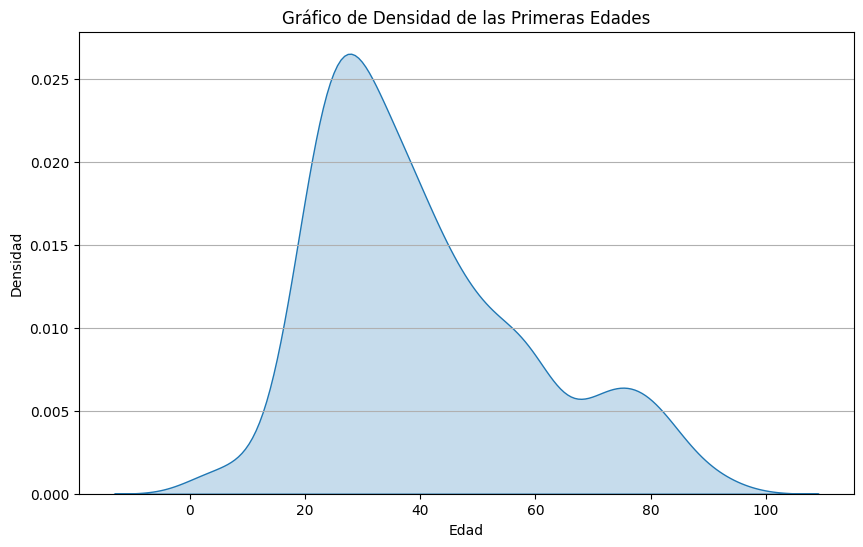

In [114]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=siniestros_caba['EDAD'], shade=True)
plt.title('Gráfico de Densidad de las Primeras Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(axis='y')
plt.show()

/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_14435/512930851.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=siniestros_caba['EDAD'], shade=True)


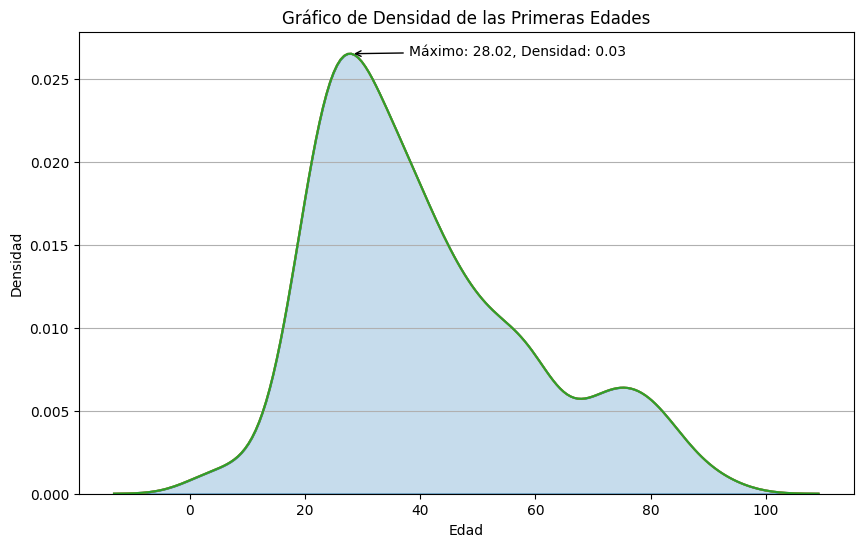

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que "siniestros_caba" es tu DataFrame con la columna "EDAD"
plt.figure(figsize=(10, 6))
sns.kdeplot(data=siniestros_caba['EDAD'], shade=True)

# Obtén la posición del máximo en el eje y y su correspondiente valor en el eje x
max_density_index = np.argmax(sns.kdeplot(data=siniestros_caba['EDAD']).get_lines()[0].get_data()[1])
max_density_value = sns.kdeplot(data=siniestros_caba['EDAD']).get_lines()[0].get_data()[1][max_density_index]
corresponding_x_value = sns.kdeplot(data=siniestros_caba['EDAD']).get_lines()[0].get_data()[0][max_density_index]

# Marca el máximo en el gráfico y ajusta la posición vertical
plt.annotate(f'Máximo: {corresponding_x_value:.2f}, Densidad: {max_density_value:.2f}', 
             xy=(corresponding_x_value, max_density_value), 
             xytext=(corresponding_x_value + 10, max_density_value - 0.0001),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('Gráfico de Densidad de las Primeras Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(axis='y')
plt.show()


In [116]:
conteo_EDAD_VICTIMA = siniestros_caba['EDAD'].value_counts()
# conteo_EDAD_VICTIMA = conteo_EDAD_VICTIMA.sort_index()
print(conteo_EDAD_VICTIMA.head())

EDAD
29.0    38
23.0    37
30.0    33
27.0    31
26.0    30
Name: count, dtype: int64


## FRANJA HORARIA

In [117]:
ocurrencias_por_barrio = siniestros_caba['FRANJA'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

FRANJA
12:00-18:00    345
06:00-12:00    315
18:00-24:00    313
00:00-06:00    205
Name: count, dtype: int64

In [118]:
ocurrencias_por_barrio = siniestros_caba['HORA'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

HORA
0 days 08:00:00    17
0 days 09:00:00    17
0 days 16:00:00    17
0 days 18:00:00    16
0 days 15:30:00    16
Name: count, dtype: int64

---
---

In [119]:
try:
    siniestros_caba.fillna('SD', inplace=True)
except Exception as e:
    print(f"Error: {e}")

/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_14435/244793162.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'SD' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  siniestros_caba.fillna('SD', inplace=True)
/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_14435/244793162.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'SD' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  siniestros_caba.fillna('SD', inplace=True)


In [120]:
ruta_archivo_ex = '_data/siniestros_caba_barrios.xlsx'
siniestros_caba.to_excel(ruta_archivo_ex, index=False)